In [1]:
#imported necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Read adult_names.csv for headers and adult_data.csv for data
header_file_df = pd.read_csv('adult_names.csv')
file_1_df = pd.read_csv('adult_data.csv',names = header_file_df['Features'],skipinitialspace = True)
#file_1_df

#Clean the data by replacing ' ?' with 'None'
file_1_df = file_1_df.replace(' ?','None')
file_1_df.drop(labels = 'fnlwgt',inplace = True,axis = 1)

file_1_df


,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
#scenario 1
#The Marketing team wants to know how Work class, Occupation and Salary are related.
#Storing all the unique values
Workclass = list(file_1_df.Workclass.unique())
Workclass.remove('Without-pay')
Workclass.remove('Never-worked')
Workclass.remove('?')

#Plotting barchart for finding relations between Workclass and salary
comp_list = []

for i in Workclass:
    count1 = 0
    count2 = 0
    for j in range(len(file_1_df)):
        if file_1_df.iloc[j]['Salary'] == '<=50K'and file_1_df.iloc[j]['Workclass'] == str(i):
            count1+=1
        elif file_1_df.iloc[j]['Salary'] == '>50K'and file_1_df.iloc[j]['Workclass'] == str(i):
            count2+=1
        else:
            continue
    comp_list.append([i,count1,count2])

x_labels = []
y_labels1 = []
y_labels2 = []
for i in comp_list:
    x_labels.append(i[0])
    y_labels1.append(i[1])
    y_labels2.append(i[2])
print(x_labels)
print(y_labels1)
print(y_labels2)


['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc']
[945, 1817, 17733, 589, 1476, 494]
[353, 724, 4963, 371, 617, 622]


#### Scenario1 plot

from statsmodels.graphics.mosaicplot import mosaic
#bar chart
spacing = np.arange(len(x_labels))
label_list = ['<=50K','>50K']
plt.bar(spacing,y_labels1,color = '#A9DBC7',label = x_labels,width =0.35)
plt.bar(spacing+0.35,y_labels2,color = '#89C5D3',label = x_labels,width =0.35)

plt.xticks(spacing+0.15,x_labels,rotation = 270)
plt.ylim(0,6000)
plt.xlabel('Work Class',fontweight='bold')
plt.ylabel('Number of people',fontweight='bold')
plt.legend(label_list)
plt.title('Relation between Workclass and Salary',pad = 30,loc = 'center',fontsize = 10,fontweight='bold')
plt.show()

#mosaic chart
mosaic_data = []
private_df = file_1_df[file_1_df['Workclass'] == 'Private']
Occupation = private_df.Occupation.unique()

chart_data = private_df.groupby(['Occupation','Salary'])
for j in Occupation:
    mosaic_data.append([len(chart_data.get_group((j,'<=50K'))),len(chart_data.get_group((j,'>50K')))])
labelizer = lambda k:{
    ('Handlers-cleaners','<=50K'):mosaic_data[0][0],('Handlers-cleaners','>50K'):mosaic_data[0][1],
    ('Prof-specialty','<=50K'):mosaic_data[1][0],('Prof-specialty','>50K'):mosaic_data[1][1],
     ('Exec-managerial','<=50K'):mosaic_data[2][0],('Exec-managerial','>50K'):mosaic_data[2][1],
     ('Other-service','<=50K'):mosaic_data[3][0],('Other-service','>50K'):mosaic_data[3][1],
     ('Adm-clerical','<=50K'):mosaic_data[4][0],('Adm-clerical','>50K'):mosaic_data[4][1],
     ('Sales','<=50K'):mosaic_data[5][0],('Sales','>50K'):mosaic_data[5][1],
     ('Craft-repair','<=50K'):mosaic_data[6][0],('Craft-repair','>50K'):mosaic_data[6][1],
     ('Transport-moving','<=50K'):mosaic_data[7][0],('Transport-moving','>50K'):mosaic_data[7][1],
     ('Machine-op-inspct','<=50K'):mosaic_data[8][0],('Machine-op-inspct','>50K'):mosaic_data[8][1],
     ('Tech-support','<=50K'):mosaic_data[9][0],('Tech-support','>50K'):mosaic_data[9][1],
     ('Farming-fishing','<=50K'):mosaic_data[10][0],('Farming-fishing','>50K'):mosaic_data[10][1],
     ('Protective-serv','<=50K'):mosaic_data[11][0],('Protective-serv','>50K'):mosaic_data[11][1],
     ('Priv-house-serv','<=50K'):mosaic_data[12][0],('Priv-house-serv','>50K'):mosaic_data[12][1]
}[k]

plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True

box_color = {('Handlers-cleaners','<=50K'):'#A9DBC7',('Handlers-cleaners','>50K'):'#89C5D3',
         ('Prof-specialty','<=50K'):'#F7EFCF', ('Prof-specialty','>50K'):'#FCDCC8',
         ('Exec-managerial','<=50K'):'#E0BBE4', ('Exec-managerial','>50K'):'#957DAD',
         ('Other-service','<=50K'):'#D9E3B1', ('Other-service','>50K'):'#AECCA5',
         ('Adm-clerical','<=50K'):'#E6CBA8', ('Adm-clerical','>50K'):'#D6AD98',
         ('Sales','<=50K'):'#FEE1E8', ('Sales','>50K'):'#F3B0C3',
         ('Craft-repair','<=50K'):'#FFD8BE', ('Craft-repair','>50K'):'#FFC8A2',
         ('Transport-moving','<=50K'):'#AED7ED', ('Transport-moving','>50K'):'#3681AB',
        ('Machine-op-inspct','<=50K'):'#def4f0', ('Machine-op-inspct','>50K'):'#74d4c0',
         ('Tech-support','<=50K'):'#A08679', ('Tech-support','>50K'):'#765341',
         ('Farming-fishing','<=50K'):'#E3735E', ('Farming-fishing','>50K'):'#D22B2B',
         ('Protective-serv','<=50K'):'#FFFDD0', ('Protective-serv','>50K'):'#FFD700',
        ('Priv-house-serv','<=50K'):'#C0C0C0', ('Priv-house-serv','>50K'):'#686868'
        }

mosaic(private_df,['Occupation','Salary'],labelizer=labelizer,label_rotation=270,properties=lambda key: {'color': box_color[key]})
plt.title('Salary Distribution of Private Workclass Population',pad = 30,loc = 'center',fontsize = 10,fontweight='bold')
plt.show()


In [17]:
#scenario 2
#The Marketing team is interested in visualizing the relationship between Age, Gender and Salary.
a = file_1_df.groupby(['Sex','Salary'])
fem_gt_50k = a.get_group(('Female','>50K'))
fem_lt_50k = a.get_group(('Female','<=50K'))
male_gt_50k = a.get_group(('Male','>50K'))
male_lt_50k = a.get_group(('Male','<=50K'))

plot_list = [fem_gt_50k,fem_lt_50k,male_gt_50k,male_lt_50k]

final_list = []
for j in range(len(plot_list)):
    b = [0]*8
    for i in range(len(plot_list[j])):
        if (plot_list[j].iloc[i]['Age'] >0) and (plot_list[j].iloc[i]['Age'] <= 20):
            b[0]+=1
        elif (plot_list[j].iloc[i]['Age'] >=21) and (plot_list[j].iloc[i]['Age'] <= 30):
            b[1]+=1
        elif (plot_list[j].iloc[i]['Age'] >=31) and (plot_list[j].iloc[i]['Age'] <= 40):
            b[2]+=1
        elif (plot_list[j].iloc[i]['Age'] >=41) and (plot_list[j].iloc[i]['Age'] <= 50):
            b[3]+=1
        elif (plot_list[j].iloc[i]['Age'] >=51) and (plot_list[j].iloc[i]['Age'] <= 60):
            b[4]+=1
        elif (plot_list[j].iloc[i]['Age'] >=61) and (plot_list[j].iloc[i]['Age'] <= 70):
            b[5]+=1
        elif (plot_list[j].iloc[i]['Age'] >=71) and (plot_list[j].iloc[i]['Age'] <= 80):
            b[6]+=1
        elif (plot_list[j].iloc[i]['Age'] >81) and (plot_list[j].iloc[i]['Age'] <= 100):
            b[7]+=1
        else:
            continue
    final_list.append(b)
print(final_list)



[[1, 157, 409, 366, 189, 47, 8, 2], [1172, 2929, 2157, 1688, 961, 514, 140, 22], [1, 523, 1997, 2289, 1358, 410, 72, 9], [1236, 4553, 3983, 2640, 1620, 821, 221, 46]]


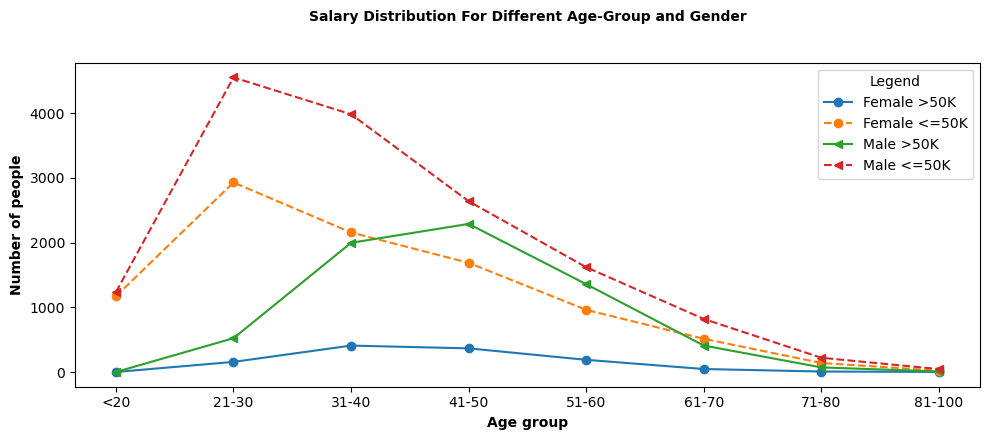

In [18]:
#Scenario2 plot
age_group = ['<20','21-30','31-40','41-50','51-60','61-70','71-80','81-100']
plt.plot(age_group,final_list[0],marker = 'o')
plt.plot(age_group,final_list[1],marker = 'o',linestyle='dashed')
plt.plot(age_group,final_list[2],marker = '<')
plt.plot(age_group,final_list[3],marker = '<',linestyle='dashed')
linechart_labels = ['Female >50K','Female <=50K','Male >50K','Male <=50K']
plt.legend(linechart_labels,title ="Legend",loc = 'upper right')
plt.xlabel('Age group',fontweight='bold')
plt.ylabel('Number of people',fontweight='bold')
plt.title('Salary Distribution For Different Age-Group and Gender',pad = 30,loc = 'center',fontsize = 10,fontweight='bold')
plt.show()



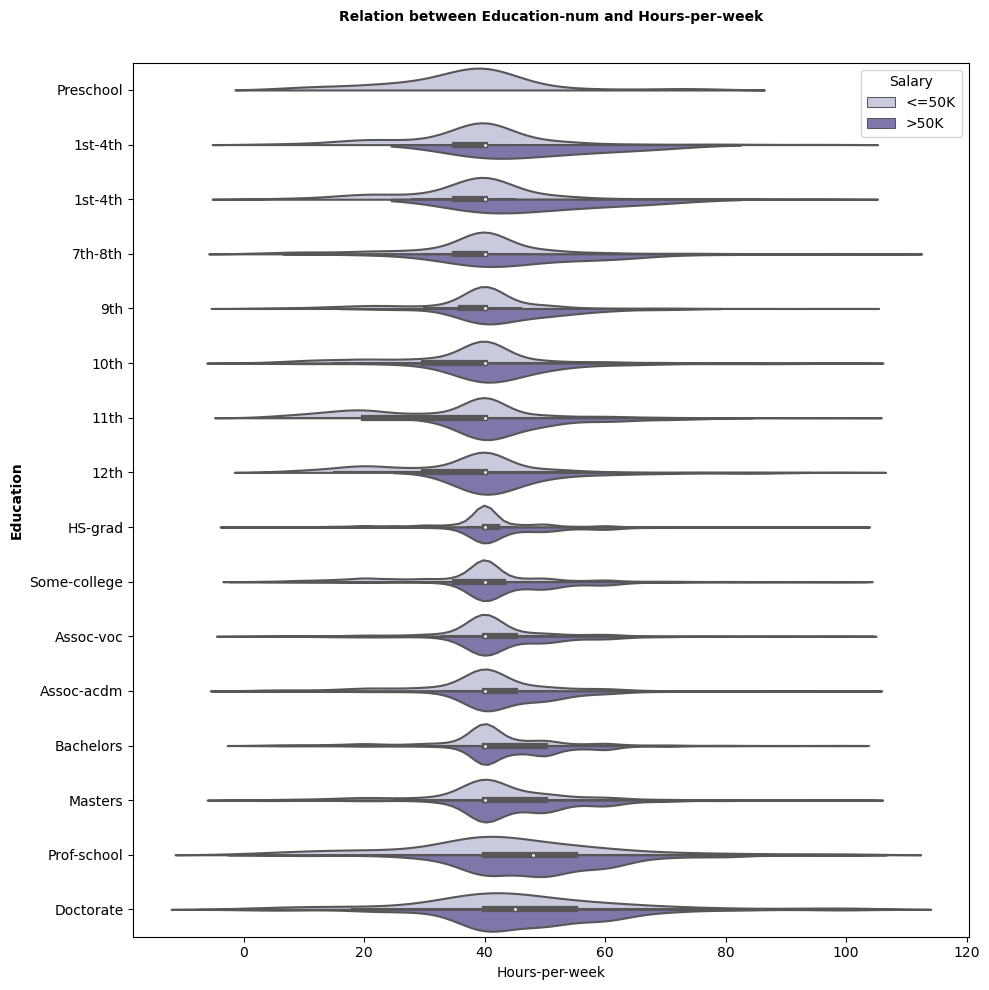

In [103]:
#scenario 3
#The Marketing executives are curious in understanding the relationship between Education, Hours-per-Week and Salary
x_label_list = ['Preschool','1st-4th','1st-4th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Prof-school','Doctorate']
sns.violinplot(x = 'Hours-per-week',y= 'Education' ,data = file_1_df,hue='Salary',order = x_label_list,palette='Purples',split=True)
plt.ylabel('Education',fontweight='bold')
plt.title('Relation between Education-num and Hours-per-week',pad = 30,loc = 'center',fontsize = 10,fontweight='bold')
plt.show()

In [129]:
#scenario 4
#The UVW college marketing team is interested in the association of Marital status, Relationship and Salary.
import pandas as pd
import plotly.express as px

df_for_pcp = file_1_df.groupby(['Marital-status','Relationship','Salary']).size().reset_index(name='counts')

name_list=[]
sal_lte50k = []
sal_gt50k = []
for i in range(len(df_for_pcp)):
    name_list.append(df_for_pcp.iloc[i]['Marital-status']+" & "+df_for_pcp.iloc[i]['Relationship'])
df_for_pcp['name_list']=list(name_list)
unique_name_list=df_for_pcp['name_list'].unique()
for j in range(len(unique_name_list)):
    for k in range(len(df_for_pcp)):
        if df_for_pcp.iloc[k]['name_list']==unique_name_list[j] and df_for_pcp.iloc[k]['Salary']=='<=50K':
            sal_lte50k.append(df_for_pcp.iloc[k]['counts'])
            if df_for_pcp.iloc[k+1]['name_list']==unique_name_list[j] and df_for_pcp.iloc[k+1]['Salary']=='>50K':
                sal_gt50k.append(df_for_pcp.iloc[k+1]['counts'])
            if df_for_pcp.iloc[k+1]['name_list']!=unique_name_list[j]:
                sal_gt50k.append(0)
            else:
                continue

df_for_pcp_final= pd.DataFrame()
df_for_pcp_final['Relationship and Marital-status list']= unique_name_list
df_for_pcp_final['salary_less_than_or_equal50k']=sal_lte50k
df_for_pcp_final['avg_hours_per_week']=[0]* len(df_for_pcp_final)
df_for_pcp_final['salary_greater_than50k']=sal_gt50k
names=[]
avg_list=[]
for l in range(len(unique_name_list)):
    names=unique_name_list[l].split(' & ')
    hpw=[]
    avg=0
    for m in range(len(file_1_df)):
        if file_1_df.iloc[m]['Marital-status'] == names[0] and file_1_df.iloc[m]['Relationship'] == names[1]:
            hpw.append(file_1_df.iloc[m]['Hours-per-week'])
    avg=sum(hpw)/len(hpw)
    avg_list.append(avg)

df_for_pcp_final['avg_hours_per_week'] = avg_list
final_name_dict = { 'Divorced & Not-in-family':0,'Divorced & Other-relative':1,'Divorced & Own-child':2,
                   'Divorced & Unmarried':3,'Married-AF-spouse & Husband':4,'Married-AF-spouse & Other-relative':5,
                   'Married-AF-spouse & Own-child':6,'Married-AF-spouse & Wife':7,'Married-civ-spouse & Husband':8,
                   'Married-civ-spouse & Not-in-family':9,'Married-civ-spouse & Other-relative':10,
                   'Married-civ-spouse & Own-child':11,'Married-civ-spouse & Wife':12,
                   'Married-spouse-absent & Not-in-family':13,'Married-spouse-absent & Other-relative':14,
                   'Married-spouse-absent & Own-child':15,'Married-spouse-absent & Unmarried':16,
                   'Never-married & Not-in-family':17,'Never-married & Other-relative':18,
                   'Never-married & Own-child':19,'Never-married & Unmarried':20,'Separated & Not-in-family':21,
                   'Separated & Other-relative':22,'Separated & Own-child':23,'Separated & Unmarried':24,
                   'Widowed & Not-in-family':25,'Widowed & Other-relative':26,'Widowed & Own-child':27,'Widowed & Unmarried':28}
       
df_for_pcp_final=df_for_pcp_final.replace(to_replace = final_name_dict)

fig = px.parallel_coordinates(df_for_pcp_final,color="Relationship and Marital-status list",
                              dimensions=['salary_less_than_or_equal50k','avg_hours_per_week', 'salary_greater_than50k'],
                              title='Salary Distribution For Relationship and Marital-status Combination')

fig.show()
display_df=pd.DataFrame()
display_df['Encoded Value']= df_for_pcp_final['Relationship and Marital-status list']
display_df['Combinations']=unique_name_list

from IPython.display import HTML
HTML(display_df.to_html(index=False))


Encoded Value,Combinations
0,Divorced & Not-in-family
1,Divorced & Other-relative
2,Divorced & Own-child
3,Divorced & Unmarried
4,Married-AF-spouse & Husband
5,Married-AF-spouse & Other-relative
6,Married-AF-spouse & Own-child
7,Married-AF-spouse & Wife
8,Married-civ-spouse & Husband
9,Married-civ-spouse & Not-in-family


In [133]:
#scenario 5
#The UVW team wants to know the link between Country, Race, and Income.

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

countries=pd.DataFrame()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world1 = world[['name','continent','geometry','iso_a3']]

df_for_chloropleth = file_1_df.groupby(['Race','Salary'])
df_for_choloro_lte50k = df_for_chloropleth.get_group(('Asian-Pac-Islander','<=50K'))
df_for_choloro_gt50k = df_for_chloropleth.get_group(('Asian-Pac-Islander','>50K'))


countries['Native-country']=df_for_choloro_lte50k['Native-country'].unique()
countlist_lte50k=[]
count=0
for i in range(len(countries)):
    for j in range(len(df_for_choloro_lte50k)):
        if countries['Native-country'].iloc[i] == df_for_choloro_lte50k['Native-country'].iloc[j]:
            count+=1
    countlist_lte50k.append(count)
    count=0
countries['Count']=countlist_lte50k
countries.at[2,'Native-country']='United States of America'
countries.at[23,'Native-country']='Dominican Rep.'
countries.at[17,'Native-country']='Trinidad and Tobago'
countries.at[18,'Native-country']='Puerto Rico'
plot_df_for_choloro_lte50k = pd.merge(world1,countries,right_on='Native-country',left_on='name',how = 'right')

data= dict (type='choropleth',locations = plot_df_for_choloro_lte50k['iso_a3'],z=plot_df_for_choloro_lte50k['Count'],text = plot_df_for_choloro_lte50k['Native-country'],colorbar= {'title':'Count with <= $50k salary'},colorscale = 'Viridis')

layout = dict(title = 'Asian-Pac-Islander Race Salary Exploration',geo=dict(projection={'type':'natural earth'},framewidth=5))

choromap= go.Figure(data=[data],layout=layout)
iplot(choromap)


In [131]:
countries2=pd.DataFrame()

countries2['Native-country']=df_for_choloro_gt50k['Native-country'].unique()
countlist_gt50k=[]
count2=0
for i in range(len(countries2)):
    for j in range(len(df_for_choloro_gt50k)):
        if countries2['Native-country'].iloc[i] == df_for_choloro_gt50k['Native-country'].iloc[j]:
            count2+=1
    countlist_gt50k.append(count2)
    count2=0
countries2['Count']=countlist_gt50k
countries2.at[2,'Native-country']='United States of America'
countries2.at[23,'Native-country']='Dominican Rep.'
countries2.at[17,'Native-country']='Trinidad and Tobago'
countries2.at[18,'Native-country']='Puerto Rico'
plot_df_for_choloro_gt50k = pd.merge(world1,countries2,right_on='Native-country',left_on='name',how = 'right')

data= dict (type='choropleth',locations = plot_df_for_choloro_gt50k['iso_a3'],z=plot_df_for_choloro_gt50k['Count'],text = plot_df_for_choloro_gt50k['Native-country'],colorbar= {'title':'Count for > $50k'},colorscale = 'Viridis')

layout = dict(title = 'Asian-Pac-Islander Race Salary Exploration',geo=dict(projection={'type':'natural earth'},framewidth=5))

choromap= go.Figure(data=[data],layout=layout)
iplot(choromap)
